# Week 2: Optimal Bayesian Design with Mutual Information and Linear Regression

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
from tqdm.notebook import tqdm, trange

In [68]:
# assumption
noise = 0.2

def optimal_design(U, p_theta, p_y):
    pass

def mutual_information(d, joint, log_p_theta_yd, log_p_theta):
    def inner(theta, y, d):
        return joint(theta, y, d) * (log_p_theta_yd(theta, y, d) - log_p_theta(theta) - log_p_theta(theta))
    return integrate.dblquad(lambda y, theta: inner(theta, y, d), -5, 5, lambda _: -5, lambda _: 5)[0]

def p_theta(theta, prior_cov=np.array([[0.5]])):
    return stats.multivariate_normal.pdf(theta, mean=0, cov=prior_cov)
def log_p_theta(theta, prior_cov=np.array([[0.5]])):
    return stats.multivariate_normal.logpdf(theta, mean=0, cov=prior_cov)

# From week 1
def get_theta(X, y, covariance_prior):
    y = np.array([[y]])
    var_y = noise * np.eye(1)
    mean_theta = covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ y
    cov_theta = covariance_prior - covariance_prior @ X.T @ np.linalg.inv(var_y + X @ covariance_prior @ X.T) @ X @ covariance_prior
    return mean_theta, cov_theta

def log_p_theta_yd(theta, y, d):
    mean, cov = get_theta(d, y, np.array([[0.5]]))
    return stats.multivariate_normal.logpdf(theta, mean=mean, cov=cov)

def joint(theta, y, d):
    # Joint probability conditioned on theta with p(theta|d) = p(theta) = likelihood * prior
    def likelihood(y, d, theta):
        return stats.multivariate_normal.pdf(y, mean=theta * d, cov=np.array([[noise]]))
    return likelihood(y, d, theta) * p_theta(theta)

In [62]:
mutual_information(np.array([[1]]), joint, log_p_theta_yd, log_p_theta)

(1.6987463634264364, 1.3141949905237438e-08)

  0%|          | 0/10 [00:00<?, ?it/s]

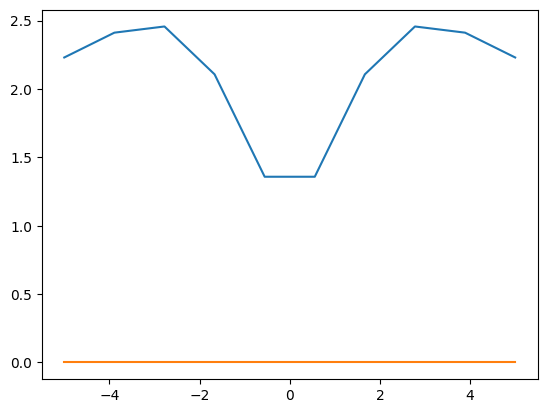

In [67]:
ys = []
for x in tqdm(np.linspace(-5,5,num=10)):
    ys.append(mutual_information(np.array([[x]]), joint, log_p_theta_yd, log_p_theta))

plt.plot(np.linspace(-5,5,num=10), ys)